<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/Intro_to_Deep_Learning_IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The IMDB dataset actually comes packaged with keras and its allready tokenized, menaing the text is allready converted in a sequence of unique word indices. The IMDB dataset contains 50,000 movie reviews (25,000 for training and 25,000 for testing). Each set contains of 50% positive and 50% negative reviews (12,500 x 2). 

In [0]:
import numpy as np
from keras.datasets import imdb

In [0]:
vocabulary=7500 # we will only use the 7500 most frequently used words

Next block of code block has been commented out because it does not work anymore

In [0]:
# save np.load
#np_load_old = np.load

# modify the default parameters of np.load
#np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
#(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocabulary)

# restore np.load for future normal usage
#np.load = np_load_old

In [0]:
np.load.__defaults__=(None, True, True, 'ASCII')
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocabulary)
np.load.__defaults__=(None, False, True, 'ASCII')

In the next line of code we will print the lists that contain sequences of words represented by a word index. If the text has not been converted to a sequence of indices we would need to add one pre-processing step using Tokenizer

In [26]:
print(train_data[1]) # train_data is a list of word sequences

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


Now we will vectorize the training and test data. Basically we will create a matrix where the rows are the reviews and where the columns represent the vocabulary (7500 columns). We will set a 1 in the correct column if the word of the review matches a word of the vocabulary. This means that matrix will be rather sparse.

In [0]:
def vectorize_sequences(sequences, dimension=vocabulary):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

Now we apply the function to our training and test data as well as the labels. For the labels we use a different method. We simply use the asarray function to convert the list to an array and we assign the items in the array to float32 

In [0]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [0]:
from keras import models
from keras import layers
from keras import optimizers
from keras import losses
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(vocabulary,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Validation Set

In [0]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [32]:
history=model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val)) #history object contains training details - object has a member dictionary

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 155us/step - loss: 0.5225 - acc: 0.7896 - val_loss: 0.4088 - val_acc: 0.8542
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.3255 - acc: 0.8938 - val_loss: 0.3147 - val_acc: 0.8832
Epoch 3/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.2464 - acc: 0.9204 - val_loss: 0.2847 - val_acc: 0.8881
Epoch 4/20
15000/15000 [==============================] - 2s 128us/step - loss: 0.1953 - acc: 0.9368 - val_loss: 0.3008 - val_acc: 0.8769
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1658 - acc: 0.9450 - val_loss: 0.2828 - val_acc: 0.8855
Epoch 6/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1449 - acc: 0.9515 - val_loss: 0.2898 - val_acc: 0.8841
Epoch 7/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1209 - acc: 0.9630 - val_loss: 0.2980 - 

In [0]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, 21)

<function matplotlib.pyplot.show>

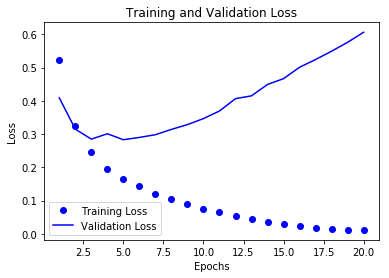

In [36]:
plt.plot(epochs, loss_values, 'bo', label='Training Loss') #bo is for blue dotted line
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') #b is for blue line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [42]:
model=models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(vocabulary,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 138us/step - loss: 0.4455 - acc: 0.8176
Epoch 2/4
25000/25000 [==============================] - 3s 123us/step - loss: 0.2618 - acc: 0.9056
Epoch 3/4
25000/25000 [==============================] - 3s 122us/step - loss: 0.2095 - acc: 0.9236
Epoch 4/4
25000/25000 [==============================] - 2s 71us/step
